In [1]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [18]:
model_list = {
    # 'withoutemotion_single': 'block_size=64/withoutemotion/singleConversation',
    # 'withoutemotion_whole':'block_size=64/withoutemotion/wholeConversation',
    'withemotion':'block_size=64/withemotion',
    'withcontext': 'block_size=64/withcontext',
    'gpt_withoutemotion': 'block_size=64/withoutemotion/singleConversation_withGPTdata',
    'gpt_blocksize_256': 'block_size=256/singleConversation_withGPTdata',
}

In [17]:
# Use defaultdict to handle overlapping iterations
data_combined = defaultdict(lambda: {"train_loss": [], "val_loss": [], "learning_rate": [], "mfu": []})

def show_result(title, data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith(".json"):
            filepath = os.path.join(data_dir, filename)
            with open(filepath, "r") as f:
                data = json.load(f)
                for i, iteration in enumerate(data["iteration"]):
                    # Append values to avoid overwriting
                    data_combined[iteration]["train_loss"].append(data["train_loss"][i])
                    data_combined[iteration]["val_loss"].append(data["val_loss"][i])
                    data_combined[iteration]["learning_rate"].append(data["learning_rate"][i])
                    data_combined[iteration]["mfu"].append(data["mfu"][i])

    # Prepare lists for plotting
    iterations = sorted(data_combined.keys())
    train_losses = [sum(data_combined[it]["train_loss"]) / len(data_combined[it]["train_loss"]) for it in iterations]
    val_losses = [sum(data_combined[it]["val_loss"]) / len(data_combined[it]["val_loss"]) for it in iterations]
    learning_rates = [sum(data_combined[it]["learning_rate"]) / len(data_combined[it]["learning_rate"]) for it in iterations]
    mfus = [sum(data_combined[it]["mfu"]) / len(data_combined[it]["mfu"]) for it in iterations]

    # Plotting the results
    plt.figure(figsize=(12, 8))

    # Training and Validation Loss
    plt.subplot(2, 1, 1)
    plt.plot(iterations, train_losses, label="Training Loss", color="blue")
    plt.plot(iterations, val_losses, label="Validation Loss", color="orange")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss for " + title)
    plt.legend()
    plt.grid()
    plt.show()
    # Save the plot
    # plt.savefig(os.path.join(save_dir, "training_results_nanoGPT.png"))
    # print("save image to", os.path.join(save_dir, "training_results.png"))

    # Learning Rate and MFU
    # plt.subplot(2, 1, 2)
    # plt.plot(iterations, learning_rates, label="Learning Rate", color="green")
    # plt.plot(iterations, mfus, label="MFU", color="red")
    # plt.xlabel("Iterations")
    # plt.ylabel("Values")
    # plt.title("Learning Rate and MFU")
    # plt.legend()
    # plt.grid()

    plt.tight_layout()
    plt.show()


training_progress_30100.json


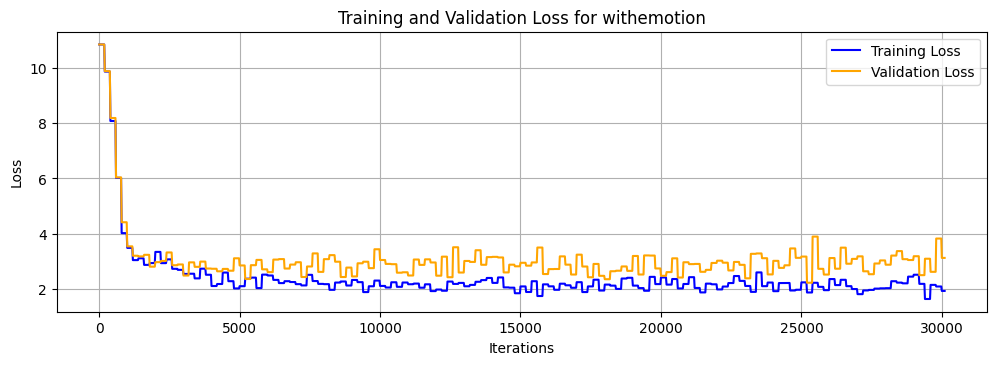

<Figure size 640x480 with 0 Axes>

training_progress_30100.json


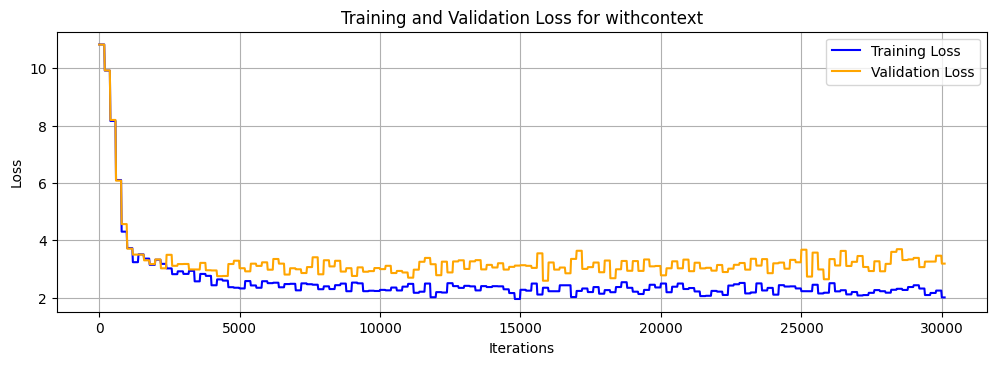

<Figure size 640x480 with 0 Axes>

training_progress_30100.json


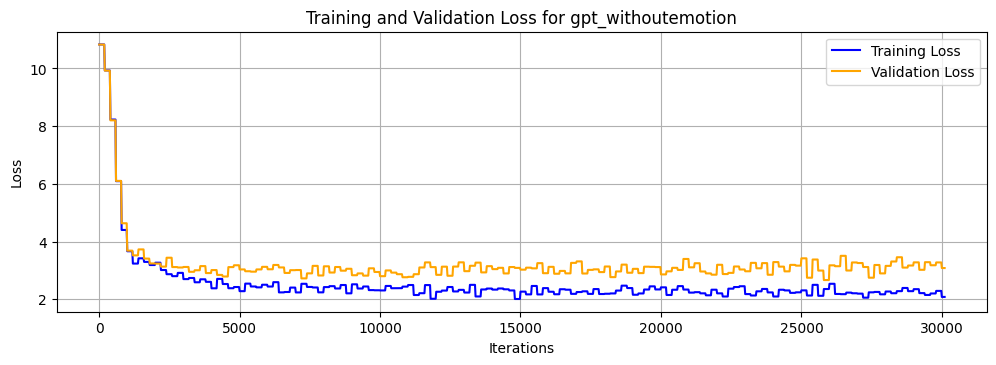

<Figure size 640x480 with 0 Axes>

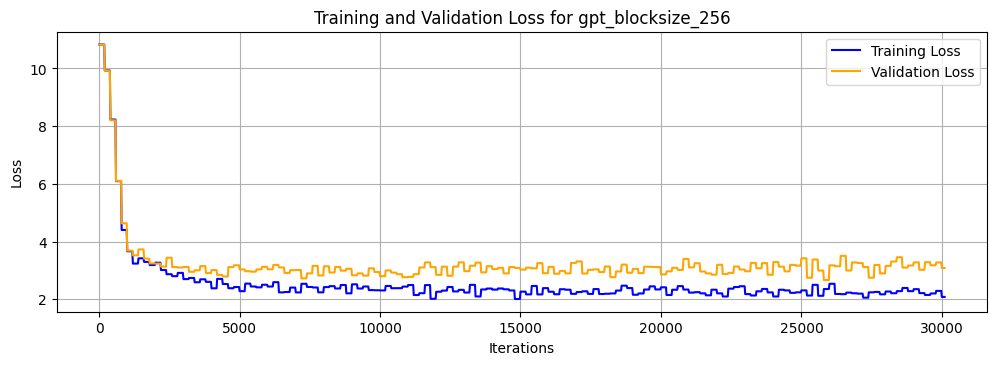

<Figure size 640x480 with 0 Axes>

In [19]:

for model, data_dir in model_list.items():
    show_result(model, os.path.join('../trained-saved', data_dir))